## Library Importation and Data Importation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import files
# files.upload()

In [3]:
df1 = pd.read_csv("data/train3.csv")
df2= pd.read_csv("data/train2.xls")
df3 = pd.read_csv("data/train1.xls")

In [4]:
df4=pd.merge(df1,df2, how='inner',on='customerid')

In [5]:
df=pd.merge(df4,df3, how='inner',on='customerid')
df4

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,firstrepaiddate,systemloanid_y,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,referredby_y,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,2016-09-01 15:51:43.000000,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,2017-05-26 00:00:00.000000,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,2017-04-26 22:03:47.000000,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
3,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,NaN,...,2017-06-25 15:13:56.000000,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
4,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,NaN,...,2017-07-25 08:04:27.000000,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858f305c8dd672015c92b0711a3333,301941335,1,2017-06-16 18:16:37.000000,2017-06-16 17:15:29.000000,10000.0,11500.0,15,2017-06-26 14:02:03.000000,NaN,...,2017-06-26 13:51:54.000000,301978946,2,2017-07-15 10:42:38.000000,2017-07-15 09:42:24.000000,10000.0,11500.0,15,NaN,Good
18179,8a858fe7568ed7420156920bff565cc7,301955570,1,2017-06-29 01:25:57.000000,2017-06-29 00:25:48.000000,10000.0,11500.0,15,2017-07-05 14:31:17.000000,NaN,...,2017-07-05 14:21:08.000000,301976025,2,2017-07-13 13:07:40.000000,2017-07-13 12:07:32.000000,10000.0,13000.0,30,NaN,Good
18180,8a858f6459b6456d0159b69978f22bed,301796830,1,2017-01-19 14:00:16.000000,2017-01-19 13:00:02.000000,10000.0,11500.0,15,2017-02-15 09:06:34.000000,NaN,...,2017-02-15 08:51:25.000000,301969032,2,2017-07-08 10:12:52.000000,2017-07-08 09:12:37.000000,10000.0,13000.0,30,NaN,Good
18181,8a858fad5ccb633e015ccbe337372ab3,301946936,1,2017-06-21 20:19:29.000000,2017-06-21 19:18:21.000000,10000.0,13000.0,30,2017-07-07 17:08:47.000000,8a858eaa55a0b8ae0155ad2cab5e49cc,...,2017-07-07 16:58:38.000000,301977456,2,2017-07-14 12:00:54.000000,2017-07-14 11:00:48.000000,10000.0,13000.0,30,8a858eaa55a0b8ae0155ad2cab5e49cc,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13693 entries, 0 to 13692
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13693 non-null  object 
 1   systemloanid_x              13693 non-null  int64  
 2   loannumber_x                13693 non-null  int64  
 3   approveddate_x              13693 non-null  object 
 4   creationdate_x              13693 non-null  object 
 5   loanamount_x                13693 non-null  float64
 6   totaldue_x                  13693 non-null  float64
 7   termdays_x                  13693 non-null  int64  
 8   closeddate                  13693 non-null  object 
 9   referredby_x                802 non-null    object 
 10  firstduedate                13693 non-null  object 
 11  firstrepaiddate             13693 non-null  object 
 12  systemloanid_y              13693 non-null  int64  
 13  loannumber_y                136

In [7]:
# df=df.dropna()
# df

In [8]:
df.describe()

,systemloanid_x,loannumber_x,loanamount_x,totaldue_x,termdays_x,systemloanid_y,loannumber_y,loanamount_y,totaldue_y,termdays_y,longitude_gps,latitude_gps
count,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000,1.369300e+04,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000,13693.000000
mean,3.018395e+08,4.200760,16566.347769,19646.612269,26.742131,3.019801e+08,8.401081,25688.673045,29812.666494,33.233769,4.482207,7.291442
std,9.304690e+04,3.269552,9375.687619,10512.238823,10.997624,1.343531e+04,4.318780,12625.374212,13772.770273,14.440482,8.639590,3.436232
min,3.016001e+08,1.000000,3000.000000,3900.000000,15.000000,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.017767e+08,2.000000,10000.000000,11500.000000,15.000000,3.019678e+08,5.000000,10000.000000,13000.000000,30.000000,3.354793,6.471885
50%,3.018545e+08,3.000000,10000.000000,13000.000000,30.000000,3.019787e+08,8.000000,30000.000000,33000.000000,30.000000,3.576022,6.617633
75%,3.019193e+08,6.000000,20000.000000,24500.000000,30.000000,3.019929e+08,11.000000,40000.000000,44000.000000,30.000000,6.364658,7.421333
max,3.020003e+08,26.000000,60000.000000,68100.000000,90.000000,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [9]:
df=df.drop_duplicates()

In [10]:
df

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,referredby_x,...,referredby_y,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,...,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,...,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,...,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
3,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,NaN,...,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
4,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,NaN,...,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,8a858ec65cf4605b015cf4ed88665334,301980231,1,2017-07-16 12:01:31.000000,2017-07-16 11:00:13.000000,10000.0,11500.0,15,2017-07-18 16:33:55.000000,NaN,...,NaN,Good,1986-02-20 00:00:00.000000,Savings,5.252457,12.991440,UBA,NaN,Permanent,NaN
13689,8a858eaf5b617c94015b6194555e10a2,301938001,1,2017-06-14 06:50:41.000000,2017-06-14 05:49:34.000000,10000.0,13000.0,30,2017-07-11 14:26:40.000000,8a858ff15b5d3f84015b5d509bd61cae,...,8a858ff15b5d3f84015b5d509bd61cae,Good,1979-04-18 00:00:00.000000,Savings,7.478858,9.055714,FCMB,NaN,Permanent,NaN
13690,8a858f305c8dd672015c92b0711a3333,301941335,1,2017-06-16 18:16:37.000000,2017-06-16 17:15:29.000000,10000.0,11500.0,15,2017-06-26 14:02:03.000000,NaN,...,NaN,Good,1989-11-19 00:00:00.000000,Savings,3.381677,6.455923,Zenith Bank,NaN,Permanent,NaN
13691,8a858fe7568ed7420156920bff565cc7,301955570,1,2017-06-29 01:25:57.000000,2017-06-29 00:25:48.000000,10000.0,11500.0,15,2017-07-05 14:31:17.000000,NaN,...,NaN,Good,1980-11-12 00:00:00.000000,Savings,6.979660,4.879515,Access Bank,NaN,Unemployed,Graduate


In [11]:
df = df.drop(["referredby_x","referredby_y",'bank_branch_clients','level_of_education_clients'], axis = 1)

In [12]:
data=df
data

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,firstduedate,...,loanamount_y,totaldue_y,termdays_y,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
3,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,2017-07-03 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
4,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,2017-07-31 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,8a858ec65cf4605b015cf4ed88665334,301980231,1,2017-07-16 12:01:31.000000,2017-07-16 11:00:13.000000,10000.0,11500.0,15,2017-07-18 16:33:55.000000,2017-07-31 00:00:00.000000,...,10000.0,11500.0,15,Good,1986-02-20 00:00:00.000000,Savings,5.252457,12.991440,UBA,Permanent
13689,8a858eaf5b617c94015b6194555e10a2,301938001,1,2017-06-14 06:50:41.000000,2017-06-14 05:49:34.000000,10000.0,13000.0,30,2017-07-11 14:26:40.000000,2017-07-14 00:00:00.000000,...,10000.0,13000.0,30,Good,1979-04-18 00:00:00.000000,Savings,7.478858,9.055714,FCMB,Permanent
13690,8a858f305c8dd672015c92b0711a3333,301941335,1,2017-06-16 18:16:37.000000,2017-06-16 17:15:29.000000,10000.0,11500.0,15,2017-06-26 14:02:03.000000,2017-07-03 00:00:00.000000,...,10000.0,11500.0,15,Good,1989-11-19 00:00:00.000000,Savings,3.381677,6.455923,Zenith Bank,Permanent
13691,8a858fe7568ed7420156920bff565cc7,301955570,1,2017-06-29 01:25:57.000000,2017-06-29 00:25:48.000000,10000.0,11500.0,15,2017-07-05 14:31:17.000000,2017-07-14 00:00:00.000000,...,10000.0,13000.0,30,Good,1980-11-12 00:00:00.000000,Savings,6.979660,4.879515,Access Bank,Unemployed


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13673 entries, 0 to 13692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 13673 non-null  object 
 1   systemloanid_x             13673 non-null  int64  
 2   loannumber_x               13673 non-null  int64  
 3   approveddate_x             13673 non-null  object 
 4   creationdate_x             13673 non-null  object 
 5   loanamount_x               13673 non-null  float64
 6   totaldue_x                 13673 non-null  float64
 7   termdays_x                 13673 non-null  int64  
 8   closeddate                 13673 non-null  object 
 9   firstduedate               13673 non-null  object 
 10  firstrepaiddate            13673 non-null  object 
 11  systemloanid_y             13673 non-null  int64  
 12  loannumber_y               13673 non-null  int64  
 13  approveddate_y             13673 non-null  obj

In [14]:
df=df.dropna()
df

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,closeddate,firstduedate,...,loanamount_y,totaldue_y,termdays_y,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
3,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,2017-07-03 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
4,8a2a81a74ce8c05d014cfb32a0da1049,301954468,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,2017-07-31 00:00:00.000000,...,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,8a858ec65cf4605b015cf4ed88665334,301980231,1,2017-07-16 12:01:31.000000,2017-07-16 11:00:13.000000,10000.0,11500.0,15,2017-07-18 16:33:55.000000,2017-07-31 00:00:00.000000,...,10000.0,11500.0,15,Good,1986-02-20 00:00:00.000000,Savings,5.252457,12.991440,UBA,Permanent
13689,8a858eaf5b617c94015b6194555e10a2,301938001,1,2017-06-14 06:50:41.000000,2017-06-14 05:49:34.000000,10000.0,13000.0,30,2017-07-11 14:26:40.000000,2017-07-14 00:00:00.000000,...,10000.0,13000.0,30,Good,1979-04-18 00:00:00.000000,Savings,7.478858,9.055714,FCMB,Permanent
13690,8a858f305c8dd672015c92b0711a3333,301941335,1,2017-06-16 18:16:37.000000,2017-06-16 17:15:29.000000,10000.0,11500.0,15,2017-06-26 14:02:03.000000,2017-07-03 00:00:00.000000,...,10000.0,11500.0,15,Good,1989-11-19 00:00:00.000000,Savings,3.381677,6.455923,Zenith Bank,Permanent
13691,8a858fe7568ed7420156920bff565cc7,301955570,1,2017-06-29 01:25:57.000000,2017-06-29 00:25:48.000000,10000.0,11500.0,15,2017-07-05 14:31:17.000000,2017-07-14 00:00:00.000000,...,10000.0,13000.0,30,Good,1980-11-12 00:00:00.000000,Savings,6.979660,4.879515,Access Bank,Unemployed


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12310 entries, 0 to 13692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 12310 non-null  object 
 1   systemloanid_x             12310 non-null  int64  
 2   loannumber_x               12310 non-null  int64  
 3   approveddate_x             12310 non-null  object 
 4   creationdate_x             12310 non-null  object 
 5   loanamount_x               12310 non-null  float64
 6   totaldue_x                 12310 non-null  float64
 7   termdays_x                 12310 non-null  int64  
 8   closeddate                 12310 non-null  object 
 9   firstduedate               12310 non-null  object 
 10  firstrepaiddate            12310 non-null  object 
 11  systemloanid_y             12310 non-null  int64  
 12  loannumber_y               12310 non-null  int64  
 13  approveddate_y             12310 non-null  obj

In [16]:
list(df['bank_name_clients'].unique())

['Diamond Bank',
 'EcoBank',
 'First Bank',
 'GT Bank',
 'UBA',
 'Union Bank',
 'FCMB',
 'Access Bank',
 'Zenith Bank',
 'Fidelity Bank',
 'Stanbic IBTC',
 'Skye Bank',
 'Sterling Bank',
 'Wema Bank',
 'Keystone Bank',
 'Unity Bank',
 'Heritage Bank',
 'Standard Chartered']

In [17]:
list(df['employment_status_clients'].unique())

['Permanent', 'Self-Employed', 'Student', 'Unemployed', 'Retired', 'Contract']

In [18]:
df = df.drop(["customerid","systemloanid_x",'approveddate_x','approveddate_y','creationdate_y','creationdate_x','closeddate','firstduedate','firstrepaiddate','systemloanid_y'], axis = 1)
df

,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
3,10,20000.0,24500.0,30,12,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
4,11,20000.0,24500.0,30,12,30000.0,34500.0,30,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,1,10000.0,11500.0,15,2,10000.0,11500.0,15,Good,1986-02-20 00:00:00.000000,Savings,5.252457,12.991440,UBA,Permanent
13689,1,10000.0,13000.0,30,2,10000.0,13000.0,30,Good,1979-04-18 00:00:00.000000,Savings,7.478858,9.055714,FCMB,Permanent
13690,1,10000.0,11500.0,15,2,10000.0,11500.0,15,Good,1989-11-19 00:00:00.000000,Savings,3.381677,6.455923,Zenith Bank,Permanent
13691,1,10000.0,11500.0,15,2,10000.0,13000.0,30,Good,1980-11-12 00:00:00.000000,Savings,6.979660,4.879515,Access Bank,Unemployed


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12310 entries, 0 to 13692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber_x               12310 non-null  int64  
 1   loanamount_x               12310 non-null  float64
 2   totaldue_x                 12310 non-null  float64
 3   termdays_x                 12310 non-null  int64  
 4   loannumber_y               12310 non-null  int64  
 5   loanamount_y               12310 non-null  float64
 6   totaldue_y                 12310 non-null  float64
 7   termdays_y                 12310 non-null  int64  
 8   good_bad_flag              12310 non-null  object 
 9   birthdate                  12310 non-null  object 
 10  bank_account_type          12310 non-null  object 
 11  longitude_gps              12310 non-null  float64
 12  latitude_gps               12310 non-null  float64
 13  bank_name_clients          12310 non-null  obj

In [20]:
s=list(df['birthdate'])
df=df.drop('birthdate', axis=1)

In [21]:
ages=[]
for w in s:
    w=w.split()
    w=w[0]
    w=int(w[:4])
    age=2020-w
    ages.append(age)
df['ages']=ages

In [22]:
df

,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,ages
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
3,10,20000.0,24500.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
4,11,20000.0,24500.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,1,10000.0,11500.0,15,2,10000.0,11500.0,15,Good,Savings,5.252457,12.991440,UBA,Permanent,34
13689,1,10000.0,13000.0,30,2,10000.0,13000.0,30,Good,Savings,7.478858,9.055714,FCMB,Permanent,41
13690,1,10000.0,11500.0,15,2,10000.0,11500.0,15,Good,Savings,3.381677,6.455923,Zenith Bank,Permanent,31
13691,1,10000.0,11500.0,15,2,10000.0,13000.0,30,Good,Savings,6.979660,4.879515,Access Bank,Unemployed,40


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12310 entries, 0 to 13692
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber_x               12310 non-null  int64  
 1   loanamount_x               12310 non-null  float64
 2   totaldue_x                 12310 non-null  float64
 3   termdays_x                 12310 non-null  int64  
 4   loannumber_y               12310 non-null  int64  
 5   loanamount_y               12310 non-null  float64
 6   totaldue_y                 12310 non-null  float64
 7   termdays_y                 12310 non-null  int64  
 8   good_bad_flag              12310 non-null  object 
 9   bank_account_type          12310 non-null  object 
 10  longitude_gps              12310 non-null  float64
 11  latitude_gps               12310 non-null  float64
 12  bank_name_clients          12310 non-null  object 
 13  employment_status_clients  12310 non-null  obj

In [24]:
df.good_bad_flag.value_counts()

Good    10137
Bad      2173
Name: good_bad_flag, dtype: int64

<AxesSubplot:xlabel='good_bad_flag', ylabel='count'>

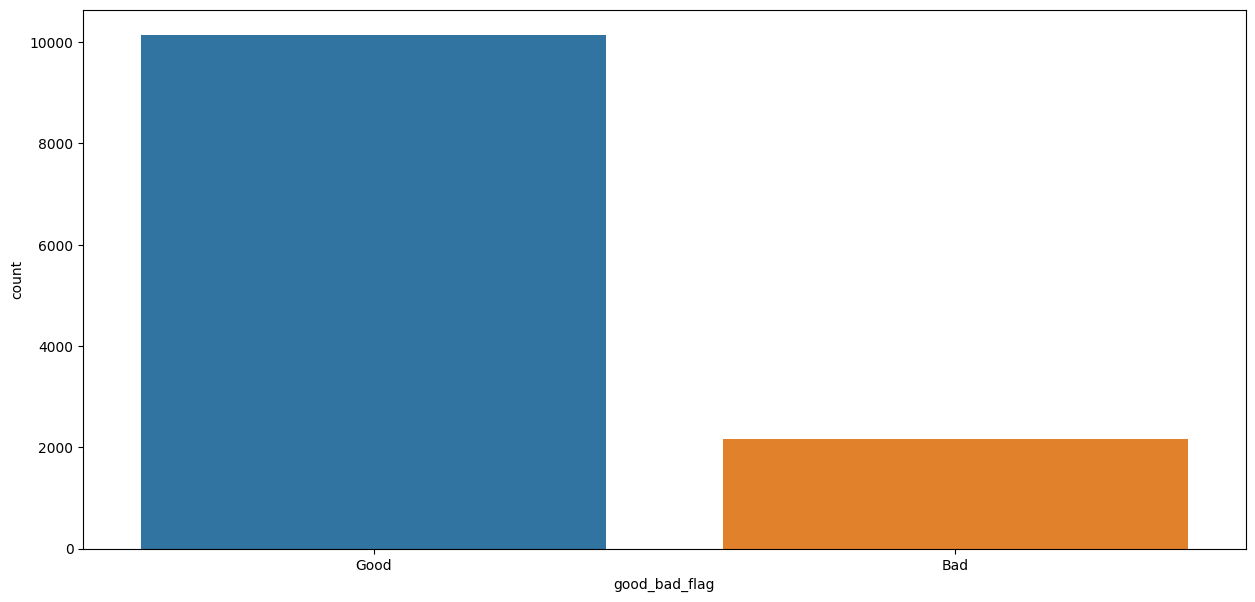

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x = "good_bad_flag", data = df)

<AxesSubplot:xlabel='ages', ylabel='count'>

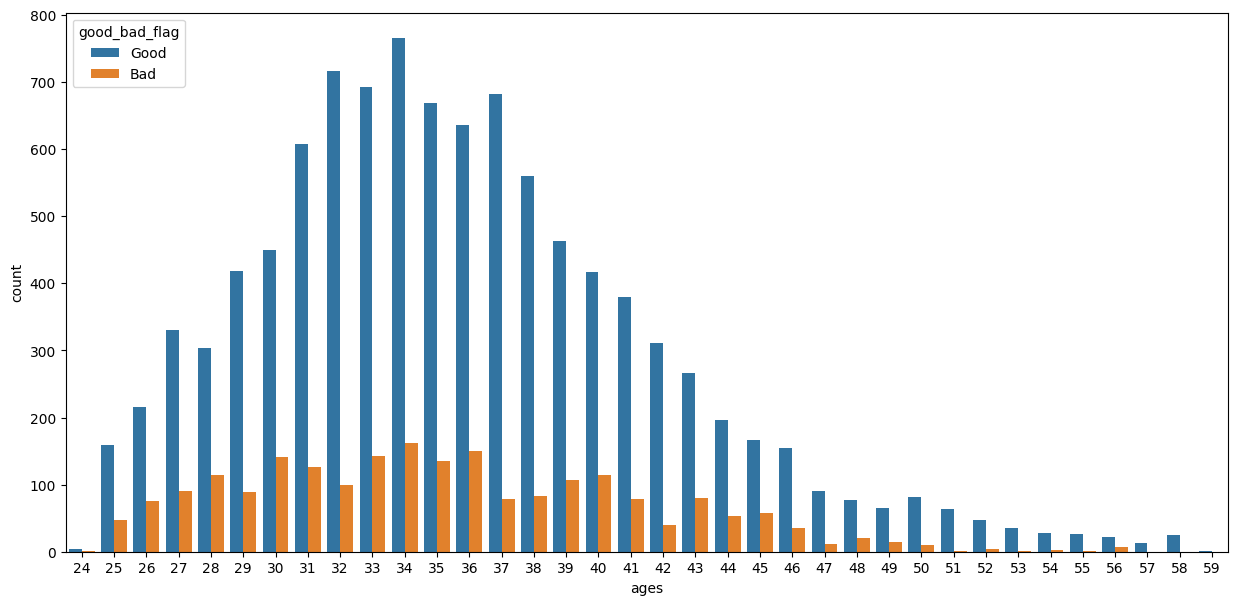

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='ages',data=df,hue='good_bad_flag')

<AxesSubplot:xlabel='loanamount_x', ylabel='count'>

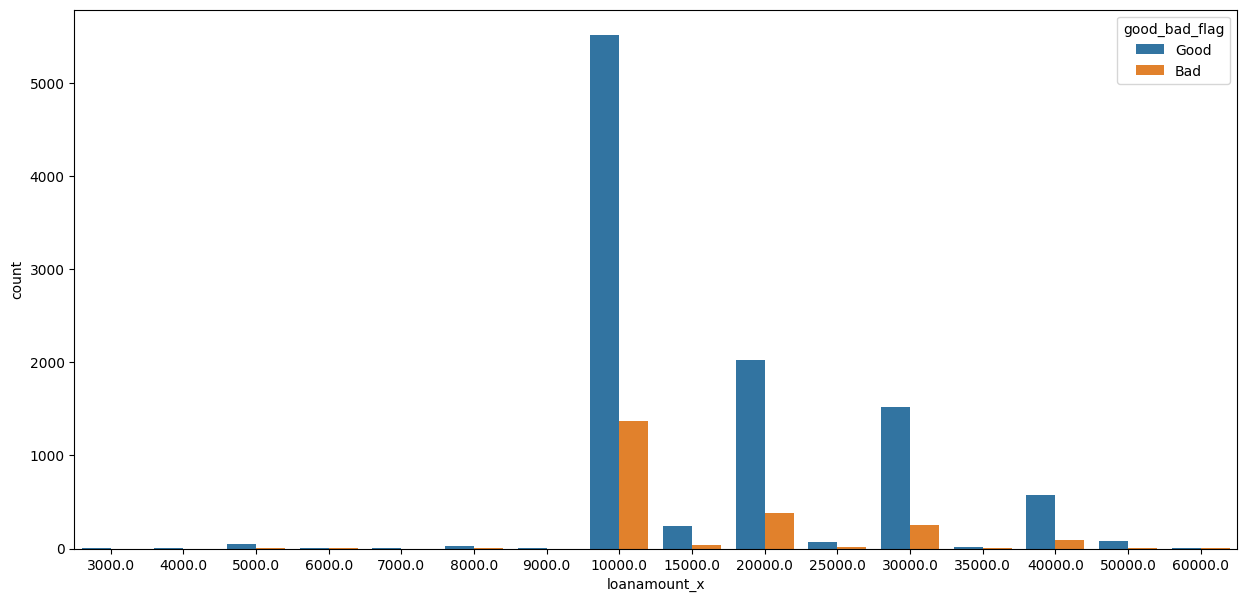

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='loanamount_x',data=df,hue='good_bad_flag')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Diamond Bank'),
  Text(1, 0, 'EcoBank'),
  Text(2, 0, 'First Bank'),
  Text(3, 0, 'GT Bank'),
  Text(4, 0, 'UBA'),
  Text(5, 0, 'Union Bank'),
  Text(6, 0, 'FCMB'),
  Text(7, 0, 'Access Bank'),
  Text(8, 0, 'Zenith Bank'),
  Text(9, 0, 'Fidelity Bank'),
  Text(10, 0, 'Stanbic IBTC'),
  Text(11, 0, 'Skye Bank'),
  Text(12, 0, 'Sterling Bank'),
  Text(13, 0, 'Wema Bank'),
  Text(14, 0, 'Keystone Bank'),
  Text(15, 0, 'Unity Bank'),
  Text(16, 0, 'Heritage Bank'),
  Text(17, 0, 'Standard Chartered')])

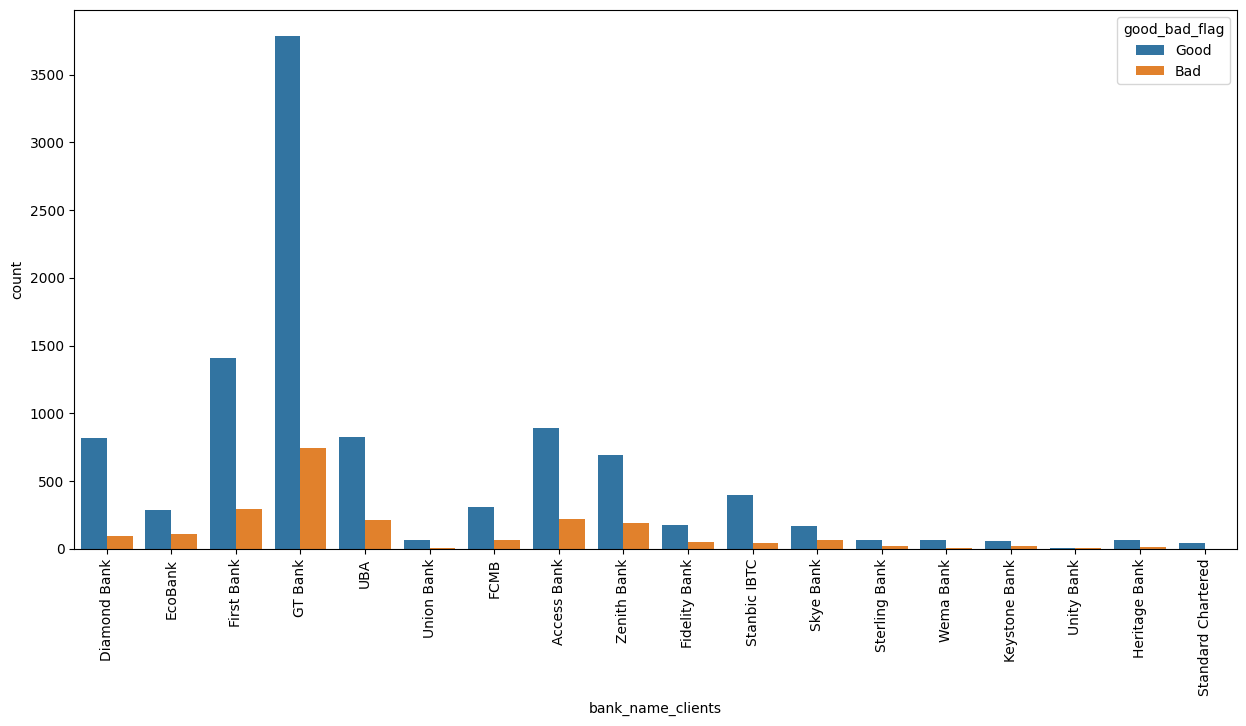

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='bank_name_clients',data=df,hue='good_bad_flag')
plt.xticks(rotation=90)

<AxesSubplot:xlabel='bank_account_type', ylabel='count'>

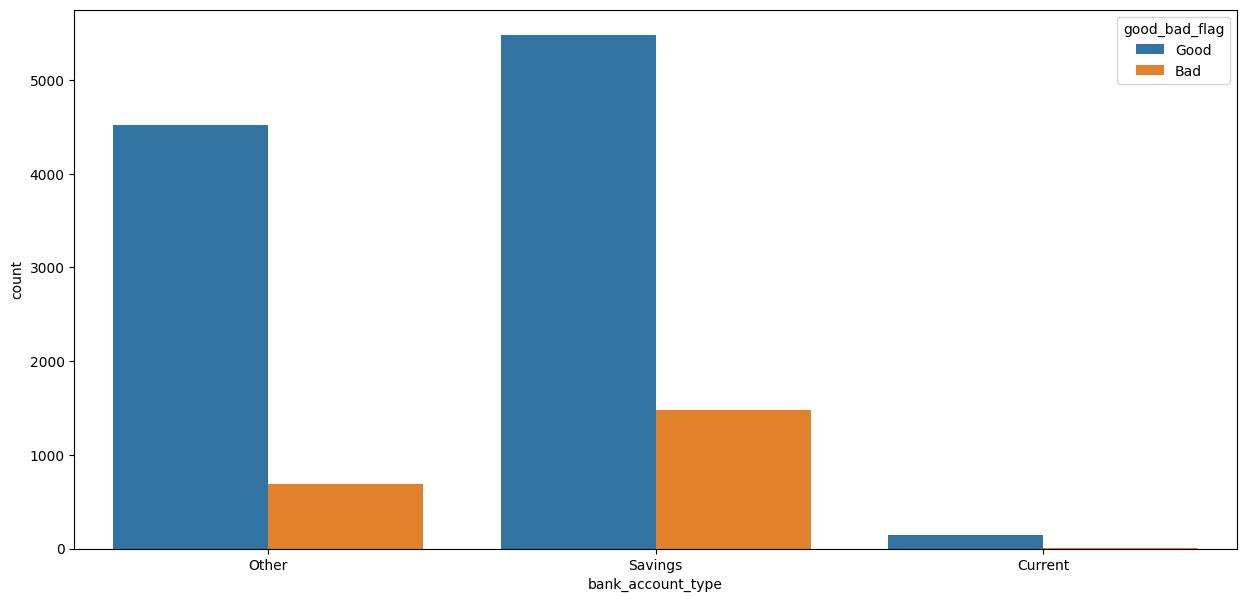

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(x='bank_account_type',data=df,hue='good_bad_flag')

<AxesSubplot:xlabel='employment_status_clients', ylabel='count'>

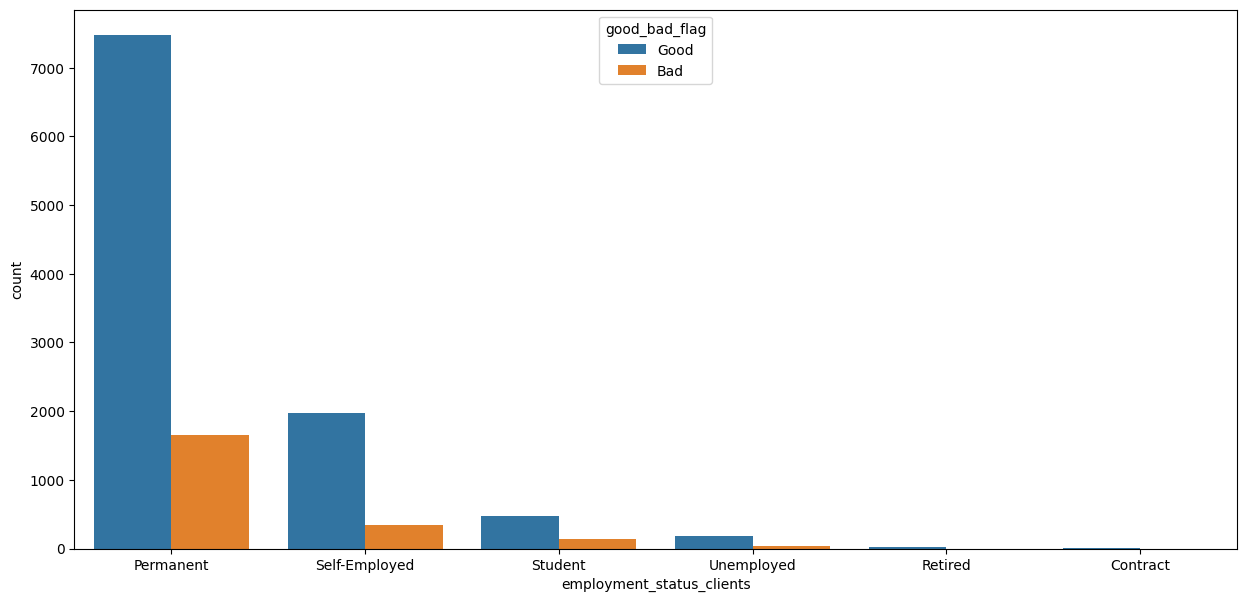

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='employment_status_clients',data=df,hue='good_bad_flag')

In [31]:
df

,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,ages
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
3,10,20000.0,24500.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
4,11,20000.0,24500.0,30,12,30000.0,34500.0,30,Good,Other,3.432010,6.433055,Diamond Bank,Permanent,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,1,10000.0,11500.0,15,2,10000.0,11500.0,15,Good,Savings,5.252457,12.991440,UBA,Permanent,34
13689,1,10000.0,13000.0,30,2,10000.0,13000.0,30,Good,Savings,7.478858,9.055714,FCMB,Permanent,41
13690,1,10000.0,11500.0,15,2,10000.0,11500.0,15,Good,Savings,3.381677,6.455923,Zenith Bank,Permanent,31
13691,1,10000.0,11500.0,15,2,10000.0,13000.0,30,Good,Savings,6.979660,4.879515,Access Bank,Unemployed,40


In [32]:
obj_columns=['good_bad_flag','bank_account_type','bank_name_clients','employment_status_clients']
le=LabelEncoder()
for x in obj_columns:
    df[x]=le.fit_transform(df[x])
df.head()

,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,good_bad_flag,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,ages
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,1,1,3.43201,6.433055,1,1,48
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,1,1,3.43201,6.433055,1,1,48
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,1,1,3.43201,6.433055,1,1,48
3,10,20000.0,24500.0,30,12,30000.0,34500.0,30,1,1,3.43201,6.433055,1,1,48
4,11,20000.0,24500.0,30,12,30000.0,34500.0,30,1,1,3.43201,6.433055,1,1,48


<AxesSubplot:>

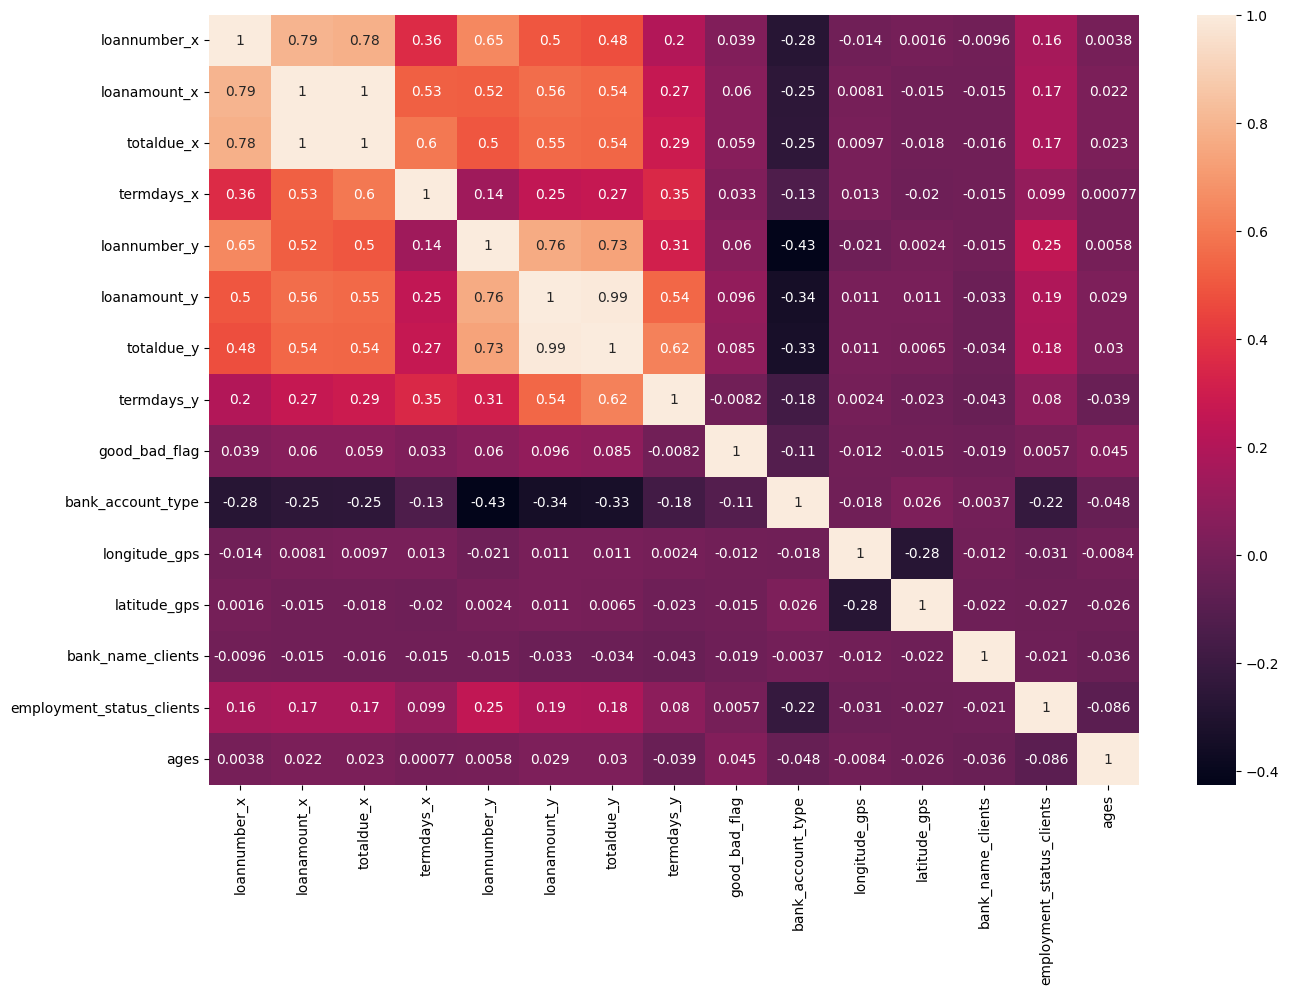

In [33]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

## Data Splitting 1

In [34]:
x = df.drop('good_bad_flag', axis=1)
y = df['good_bad_flag']

In [35]:
x

,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,ages
0,2,10000.0,13000.0,30,12,30000.0,34500.0,30,1,3.432010,6.433055,1,1,48
1,9,10000.0,13000.0,30,12,30000.0,34500.0,30,1,3.432010,6.433055,1,1,48
2,8,20000.0,23800.0,30,12,30000.0,34500.0,30,1,3.432010,6.433055,1,1,48
3,10,20000.0,24500.0,30,12,30000.0,34500.0,30,1,3.432010,6.433055,1,1,48
4,11,20000.0,24500.0,30,12,30000.0,34500.0,30,1,3.432010,6.433055,1,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,1,10000.0,11500.0,15,2,10000.0,11500.0,15,2,5.252457,12.991440,13,1,34
13689,1,10000.0,13000.0,30,2,10000.0,13000.0,30,2,7.478858,9.055714,3,1,41
13690,1,10000.0,11500.0,15,2,10000.0,11500.0,15,2,3.381677,6.455923,17,1,31
13691,1,10000.0,11500.0,15,2,10000.0,13000.0,30,2,6.979660,4.879515,0,5,40


In [36]:
y

0        1
1        1
2        1
3        1
4        1
        ..
13688    1
13689    1
13690    1
13691    1
13692    1
Name: good_bad_flag, Length: 12310, dtype: int32

## Feature Selection

['latitude_gps', 'longitude_gps', 'ages', 'loannumber_y', 'bank_name_clients', 'totaldue_y', 'loanamount_y', 'employment_status_clients', 'termdays_y', 'totaldue_x']


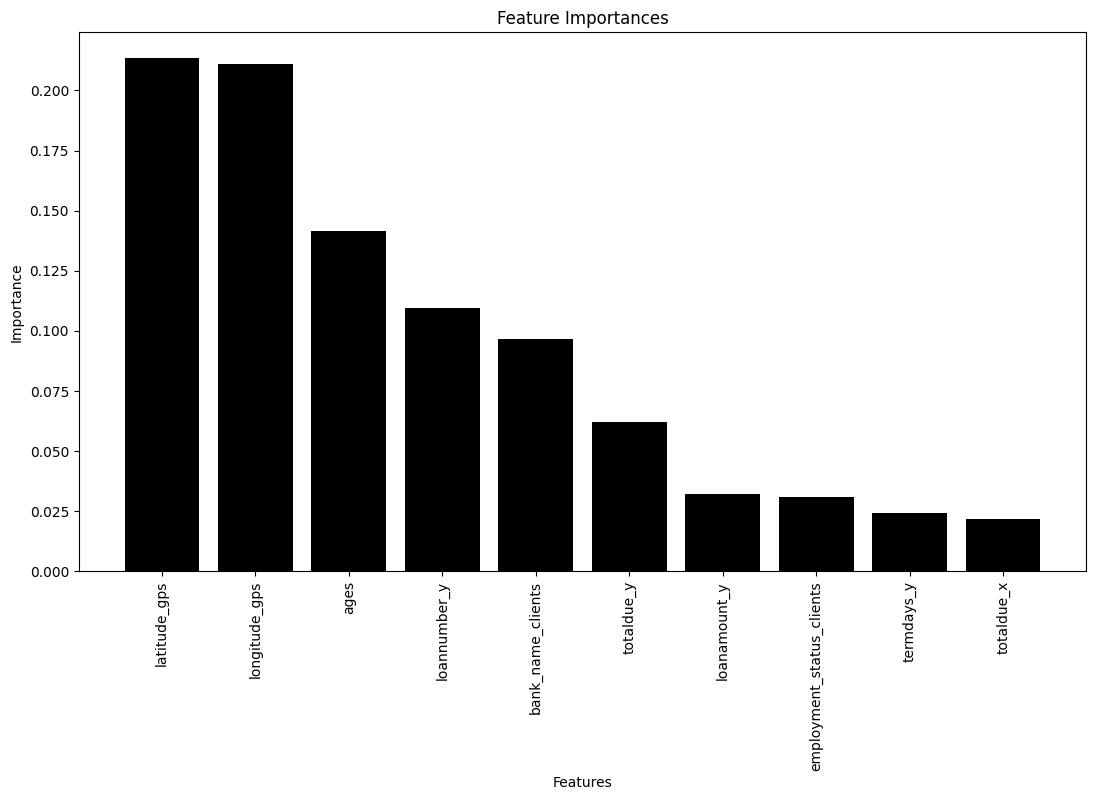

In [37]:
rf = RandomForestClassifier()
rf.fit(x,y)
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
ifs=importance_df['Feature'][:10]
selected_columns = list(ifs)
print(selected_columns)

plt.figure(figsize=(13,7))
plt.bar(ifs, importance_df['Importance'][:10], color='black')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [38]:
x = df[['longitude_gps', 'latitude_gps', 'ages', 'loannumber_y', 'bank_name_clients', 'totaldue_y', 'employment_status_clients', 'loanamount_y', 'termdays_y', 'totaldue_x']]

In [39]:
x

,longitude_gps,latitude_gps,ages,loannumber_y,bank_name_clients,totaldue_y,employment_status_clients,loanamount_y,termdays_y,totaldue_x
0,3.432010,6.433055,48,12,1,34500.0,1,30000.0,30,13000.0
1,3.432010,6.433055,48,12,1,34500.0,1,30000.0,30,13000.0
2,3.432010,6.433055,48,12,1,34500.0,1,30000.0,30,23800.0
3,3.432010,6.433055,48,12,1,34500.0,1,30000.0,30,24500.0
4,3.432010,6.433055,48,12,1,34500.0,1,30000.0,30,24500.0
...,...,...,...,...,...,...,...,...,...,...
13688,5.252457,12.991440,34,2,13,11500.0,1,10000.0,15,11500.0
13689,7.478858,9.055714,41,2,3,13000.0,1,10000.0,30,13000.0
13690,3.381677,6.455923,31,2,17,11500.0,1,10000.0,15,11500.0
13691,6.979660,4.879515,40,2,0,13000.0,5,10000.0,30,11500.0


In [40]:
sc=StandardScaler()
x = sc.fit_transform(x)

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

In [43]:
scm_model = SVC()
scm_model.fit(x_train, y_train)
scm_pred = scm_model.predict(x_test)
print(classification_report(scm_pred, y_test))
print('precision score:',precision_score(y_test,scm_pred))
print('Recall score:',recall_score(y_test,scm_pred))
print('F1 score:',f1_score(y_test,scm_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      8667
           1       0.63      0.68      0.66      7553

    accuracy                           0.67     16220
   macro avg       0.67      0.67      0.67     16220
weighted avg       0.67      0.67      0.67     16220

precision score: 0.6809214881504038
Recall score: 0.6335304262133531
F1 score: 0.6563716418862868


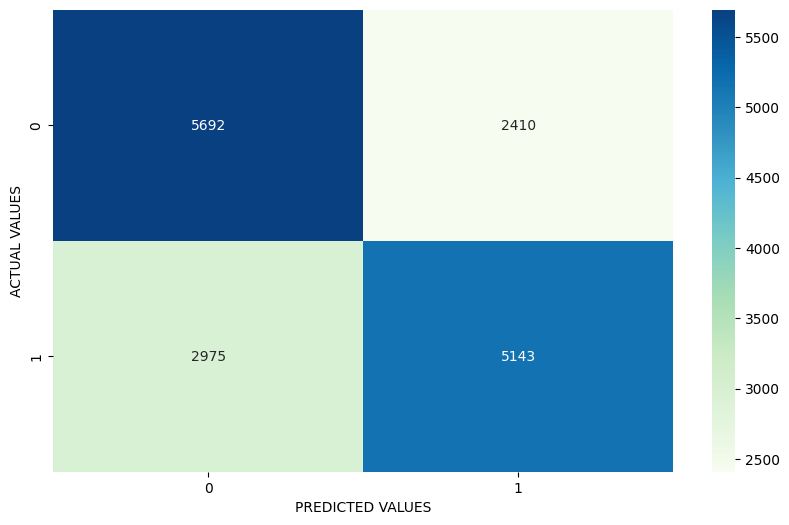

In [44]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, scm_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [45]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
lg_pred = lg_model.predict(x_test)
print(classification_report(lg_pred, y_test))
print('precision score:',precision_score(y_test,lg_pred))
print('Recall score:',recall_score(y_test,lg_pred))
print('F1 score:',f1_score(y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60      8872
           1       0.53      0.59      0.56      7348

    accuracy                           0.58     16220
   macro avg       0.58      0.58      0.58     16220
weighted avg       0.58      0.58      0.58     16220

precision score: 0.5858737071311921
Recall score: 0.5303030303030303
F1 score: 0.5567050303892409


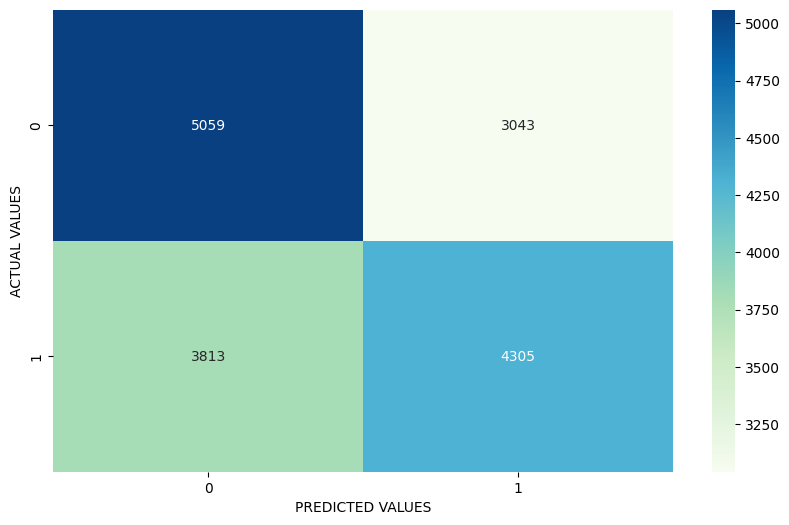

In [46]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, lg_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))
print('precision score:',precision_score(y_test,rf_pred))
print('Recall score:',recall_score(y_test,rf_pred))
print('F1 score:',f1_score(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8307
           1       0.93      0.95      0.94      7913

    accuracy                           0.94     16220
   macro avg       0.94      0.94      0.94     16220
weighted avg       0.94      0.94      0.94     16220

precision score: 0.951725009478074
Recall score: 0.9276915496427691
F1 score: 0.9395546129374337


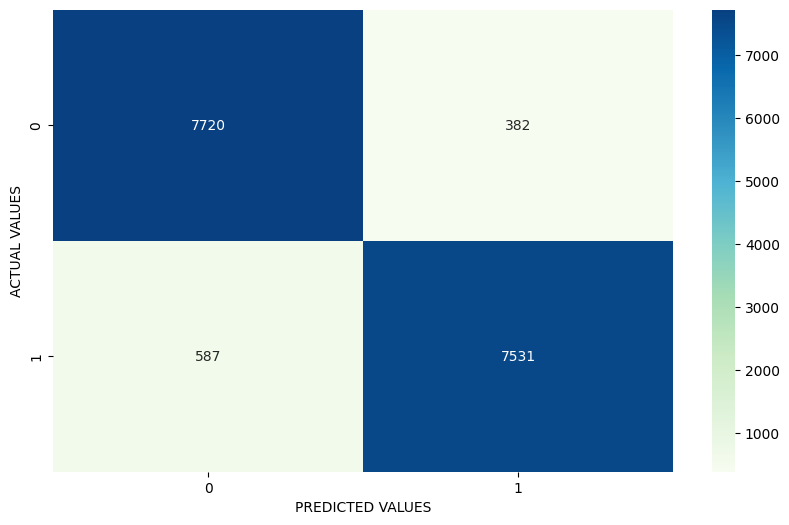

In [48]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [49]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(128,64))
mlp.fit(x_train, y_train)
mlp_pred= mlp.predict(x_test)
print(classification_report(mlp_pred, y_test))
print('precision score:',precision_score(y_test,mlp_pred))
print('Recall score:',recall_score(y_test,mlp_pred))
print('F1 score:',f1_score(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7922
           1       0.86      0.84      0.85      8298

    accuracy                           0.85     16220
   macro avg       0.85      0.85      0.85     16220
weighted avg       0.85      0.85      0.85     16220

precision score: 0.838997348758737
Recall score: 0.8576003941857601
F1 score: 0.8481968810916178


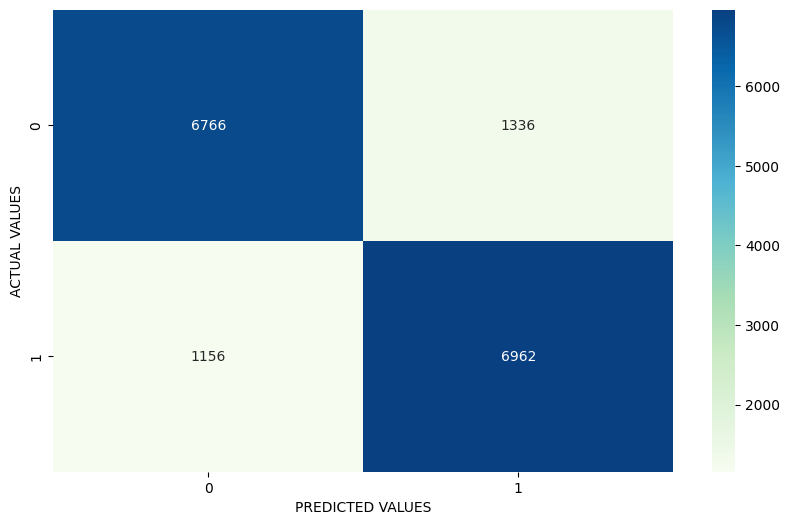

In [50]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, mlp_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [51]:
model=Sequential()
model.add(Dense(124,activation='relu',input_shape=(10,)))
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 124)               1364      
                                                                 
 dense_1 (Dense)             (None, 64)                8000      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test, y_test))
ann_pred=model.predict(x_test)
ann_pred=(ann_pred>=0.5).astype(int)
ann_pred

Epoch 1/100
127/127 [==============================] - 6s 20ms/step - loss: 0.6766 - accuracy: 0.5750 - val_loss: 0.6625 - val_accuracy: 0.5962
Epoch 2/100
127/127 [==============================] - 2s 18ms/step - loss: 0.6521 - accuracy: 0.6130 - val_loss: 0.6340 - val_accuracy: 0.6434
Epoch 3/100
127/127 [==============================] - 2s 16ms/step - loss: 0.6196 - accuracy: 0.6495 - val_loss: 0.6188 - val_accuracy: 0.6650
Epoch 4/100
127/127 [==============================] - 2s 16ms/step - loss: 0.5862 - accuracy: 0.6828 - val_loss: 0.6165 - val_accuracy: 0.6526
Epoch 5/100
127/127 [==============================] - 2s 14ms/step - loss: 0.5495 - accuracy: 0.7178 - val_loss: 0.5452 - val_accuracy: 0.7214
Epoch 6/100
127/127 [==============================] - 2s 14ms/step - loss: 0.5092 - accuracy: 0.7407 - val_loss: 0.5292 - val_accuracy: 0.7408
Epoch 7/100
127/127 [==============================] - 2s 16ms/step - loss: 0.4812 - accuracy: 0.7610 - val_loss: 0.4984 - val_accuracy:

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

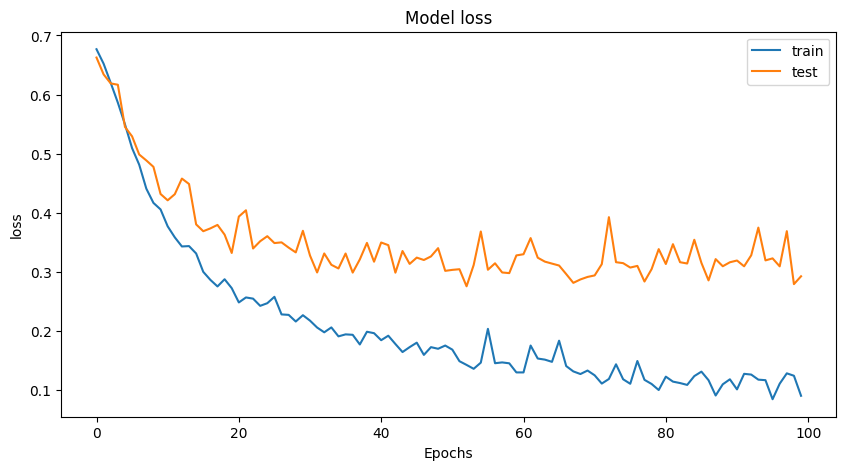

In [53]:
plt.figure(figsize=(10,5))
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['train','test'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()

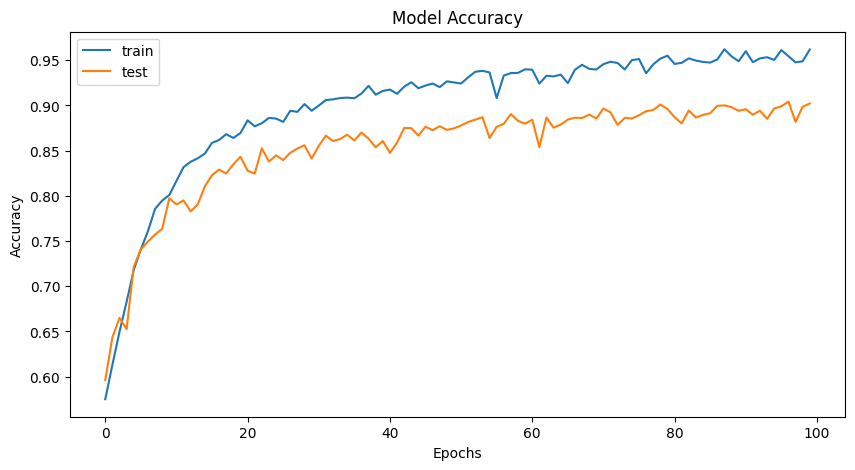

In [54]:
plt.figure(figsize=(10,5))
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [55]:
print(classification_report(ann_pred, y_test))
print('precision score:',precision_score(y_test,ann_pred))
print('Recall score:',recall_score(y_test,ann_pred))
print('F1 score:',f1_score(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      8834
           1       0.86      0.94      0.90      7386

    accuracy                           0.90     16220
   macro avg       0.90      0.91      0.90     16220
weighted avg       0.91      0.90      0.90     16220

precision score: 0.9421879230977525
Recall score: 0.8572308450357231
F1 score: 0.897703818369453


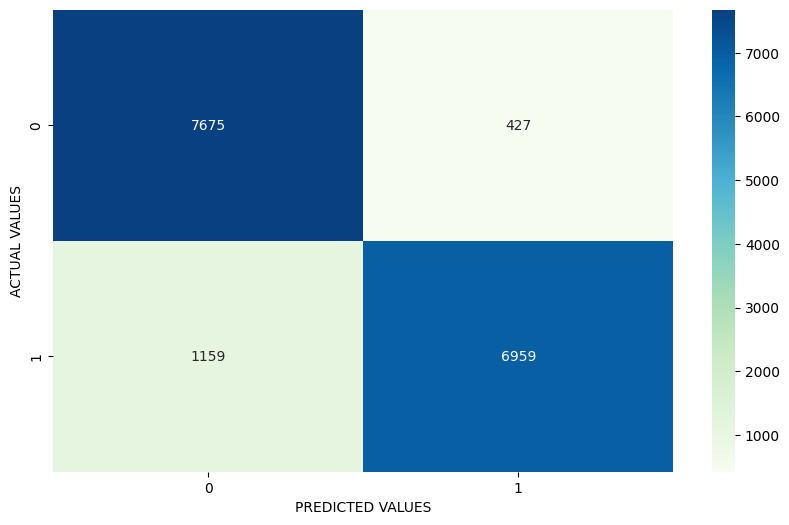

In [56]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, ann_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [57]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[('rf', rf_model), ('nn', mlp)], final_estimator=mlp)
stacking_clf.fit(x_train, y_train)
stacking_pred = stacking_clf.predict(x_test)
print(classification_report(stacking_pred, y_test))
print('precision score:',precision_score(y_test,stacking_pred))
print('Recall score:',recall_score(y_test,stacking_pred))
print('F1 score:',f1_score(y_test,stacking_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7978
           1       0.95      0.93      0.94      8242

    accuracy                           0.94     16220
   macro avg       0.94      0.94      0.94     16220
weighted avg       0.94      0.94      0.94     16220

precision score: 0.9325406454743994
Recall score: 0.9467849223946785
F1 score: 0.9396088019559902


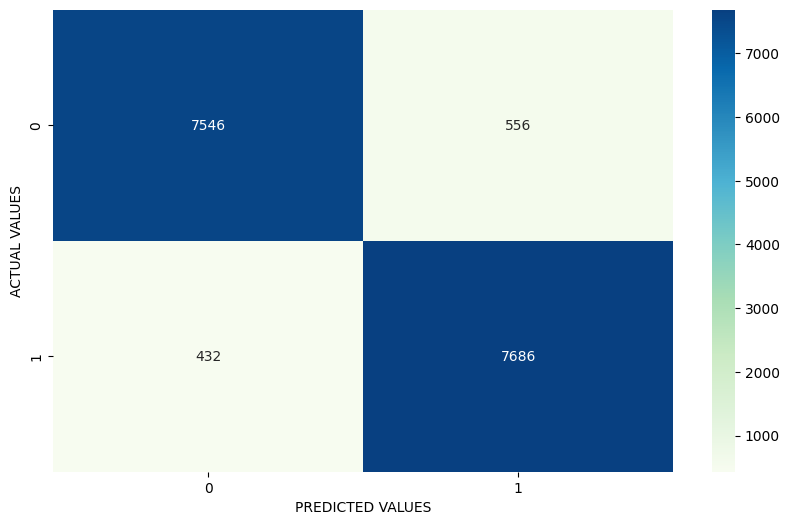

In [58]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, stacking_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [59]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [60]:

kFold=StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(stacking_clf, x_train, y_train, cv=kFold, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
stacking_clf.fit(x_train,y_train)
predictions = stacking_clf.predict(x_test)
print(classification_report(predictions,y_test))


Cross-validation scores: [0.92355117 0.91122072 0.95067818 0.91985203 0.92962963]
Mean accuracy: 0.9269863451614377
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7979
           1       0.95      0.93      0.94      8241

    accuracy                           0.94     16220
   macro avg       0.94      0.94      0.94     16220
weighted avg       0.94      0.94      0.94     16220



In [61]:
print('precision score:',precision_score(y_test,stacking_pred))
print('Recall score:',recall_score(y_test,stacking_pred))
print('F1 score:',f1_score(y_test,stacking_pred))

precision score: 0.9325406454743994
Recall score: 0.9467849223946785
F1 score: 0.9396088019559902


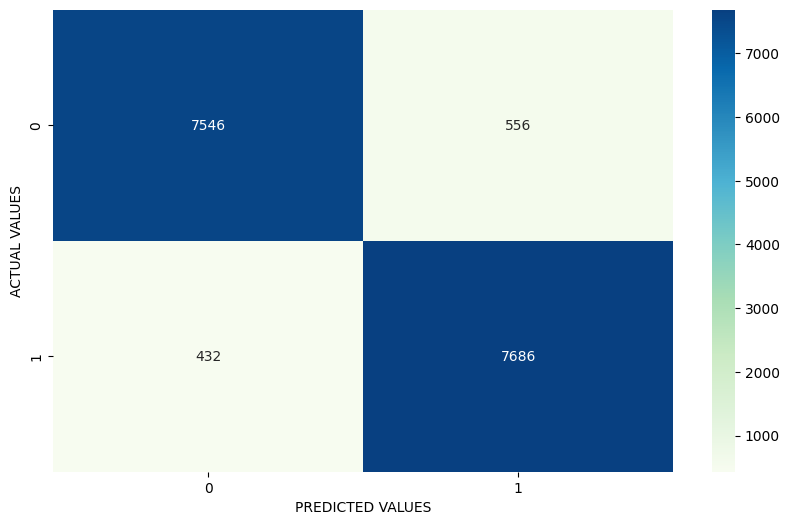

In [62]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test, stacking_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [63]:
import pickle

In [64]:
with open('model.sav','wb') as file:
    pickle.dump(stacking_clf,file)